In [90]:
## Setting up API

# Install necessary packages
!pip install pandas nltk matplotlib seaborn praw

# Import libraries
import math
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import praw

# Set Seaborn style
sns.set(style='darkgrid', context='talk', palette='Dark2')

# Initialize Reddit instance and specify subreddit
reddit = praw.Reddit(client_id='ADD CLIENT ID HERE',
                     client_secret='ADD SECRET KEY HERE',
                     user_agent='ADD USER NAME HERE')

subreddit = reddit.subreddit("Apple") 


hour_of_day  0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
day_of_week                                          ...                       
0             1   3   4   1   0   1   1   1   2   3  ...  10   8  16  13  22   
1            12   5   6   3   1   1   0   3   6   3  ...   5   6  12  13  14   
2             2   9   2   5   2   0   2   1   2   3  ...   8  15   4   7   7   
3             4   6   2   3   2   1   1   1   3   3  ...  12   4   8   6  11   
4             2   2   4   3   1   0   0   3   6   3  ...   5   4   6   3  10   
5             1   2   0   2   2   2   2   1   3   1  ...   5   6   1   4   5   
6             0   2   1   2   0   1   3   3   2   3  ...   8   7   3   4   5   

hour_of_day  19  20  21  22  23  
day_of_week                      
0            14   7   9   8   9  
1             6  13   3   4   2  
2             9  10   8   8   3  
3             8  10   3   7   4  
4             7   6   3   4   2  
5             2   1   3   1   1  
6      

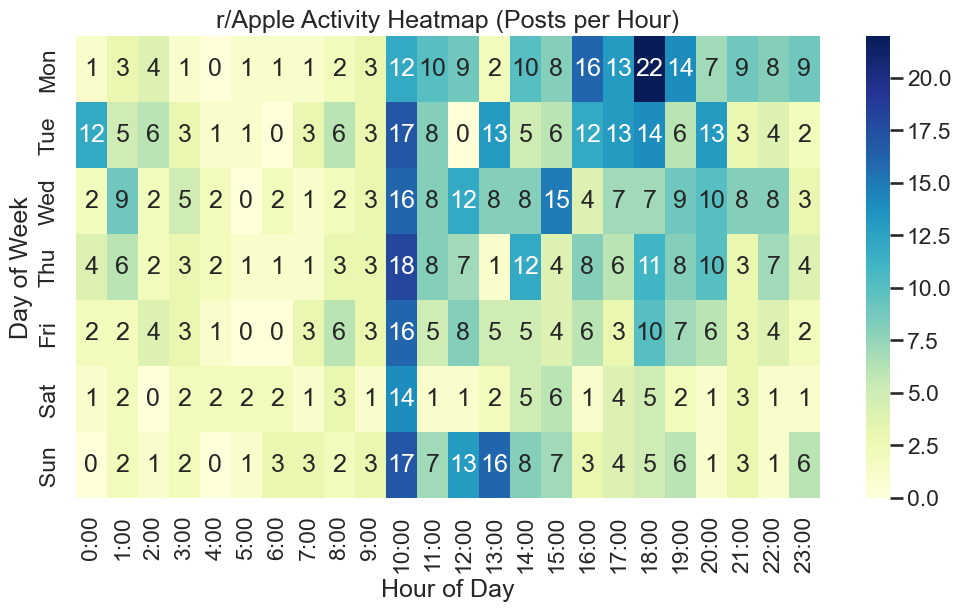

In [91]:
## Collecting Data ##

# List to store data
posts = []

# Collect recent submissions
for submission in subreddit.new(limit=1000):  # Adjust the limit as needed
    posts.append({
        "title": submission.title,
        "created_utc": submission.created_utc  # Timestamp in UTC format
    })

# Convert to DataFrame
df = pd.DataFrame(posts)



## Convert post timestamps to day-of-week and hour-of-day ##

# Convert created_utc to datetime and extract day and hour
df['created_datetime'] = pd.to_datetime(df['created_utc'], unit='s')
df['day_of_week'] = df['created_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['hour_of_day'] = df['created_datetime'].dt.hour       # 0=12am, 23=11pm

# Drop unnecessary columns
df = df[['day_of_week', 'hour_of_day']]



## Aggregate the data and visualize ##

# Group by day_of_week and hour_of_day to count posts
activity_counts = df.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)

# Show the activity counts
print(activity_counts)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(activity_counts, cmap="YlGnBu", annot=True, fmt="d", cbar=True,
            xticklabels=[f"{hour}:00" for hour in range(24)],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.title(f"r/{subreddit} Activity Heatmap (Posts per Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()